<a href="https://colab.research.google.com/github/Vemas144/PCVK_Ganjil_2025/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


 Mengubah tingkat kecerahan citra 
---------------------------------
Masukkan nilai kecerahan: 50


/tmp/ipython-input-1465720702.py:19: RuntimeWarning: overflow encountered in scalar add
  brightness_image[y, x, c] = np.clip(original[y, x, c] + brightness, 0, 255)


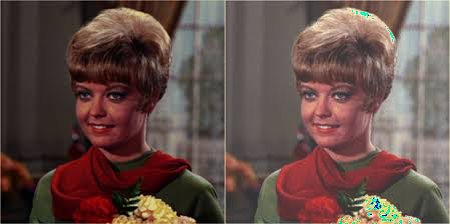

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

print(' Mengubah tingkat kecerahan citra ')
print('---------------------------------')
try:
    brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
    print('Error, not a number')

original = cv2.imread('/content/drive/MyDrive/images/female.jpeg')
brightness_image = np.zeros(original.shape, original.dtype)

# akses per piksel
for y in range(original.shape[0]):
    for x in range(original.shape[1]):
        for c in range(original.shape[2]):
            brightness_image[y, x, c] = np.clip(original[y, x, c] + brightness, 0, 255)

# cara simple tanpa for loop
# brightness_image = cv2.convertScaleAbs(original, beta=brightness)

final_frame = cv2.hconcat([original, brightness_image])
cv2_imshow(final_frame)

# Tugas

1.

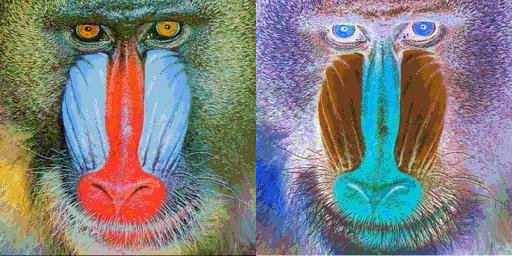

In [ ]:
# Baca gambar
original = cv2.imread('/content/drive/MyDrive/images/Baboon.png')

# Buat citra negatif dengan rumus g(x,y) = 255 - f(x,y)
inverse_image = 255 - original

# Gabungkan citra asli dan hasil inverse untuk ditampilkan berdampingan
final_frame = cv2.hconcat([original, inverse_image])

# Tampilkan hasil
cv2_imshow(final_frame)

2.

mengubah kontras dan tingkat kecerahan citra
-------------------------------------------
Masukkan tingkat kecerahan [-255 - 255]: 50
masukkan kontras [1.0 - 3.0]: 2


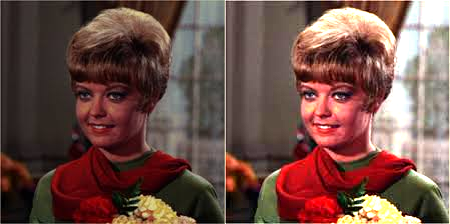

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

original = cv2.imread('/content/drive/MyDrive/images/female.jpeg')

# Implementasi transformasi contrast
print('mengubah kontras dan tingkat kecerahan citra')
print('-------------------------------------------')
try:
    alpha = float(input('Masukkan tingkat kecerahan [-255 - 255]: '))
    if alpha < -255 or alpha > 255:
        raise ValueError
        print('Error, not in range')
    alpha = float(input('masukkan kontras [1.0 - 3.0]: '))
    if alpha < 1.0 or alpha > 3.0:
        raise ValueError
        print('Error, not in range')
except ValueError:
    print('Error, not a number')
beta = 0

contrast_image = cv2.convertScaleAbs(original, alpha=alpha, beta=beta)

# Gabungkan citra asli dan hasil transformasi kontras untuk ditampilkan berdampingan
final_frame_contrast = cv2.hconcat([original, contrast_image])

# Tampilkan hasil
cv2_imshow(final_frame_contrast)

3.

Mengubah tingkat kecerahan citra dengan Transformasi Log
--------------------------------------------------------
Masukkan nilai kecerahan: 50


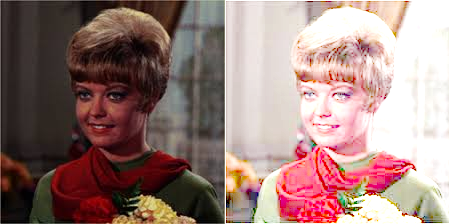

In [4]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

print('Mengubah tingkat kecerahan citra dengan Transformasi Log')
print('--------------------------------------------------------')

# Input
try:
    brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
    print('Error, not a number')
    brightness = 40   # default

original = cv2.imread('/content/drive/MyDrive/images/female.jpeg')
# Transformasi Logaritmik
log_image = np.log1p(original.astype(np.float32))   # log(1 + r)
# Normalisasi
log_image = cv2.normalize(log_image, None, 0, 255, cv2.NORM_MINMAX)
log_image = np.array(log_image, dtype=np.uint8)

# Brightnesss
log_image = cv2.convertScaleAbs(log_image, alpha=brightness/40.0, beta=0)

final_frame = cv2.hconcat([original, log_image])
cv2_imshow(final_frame)

4.

4a. Grayscale Averaging


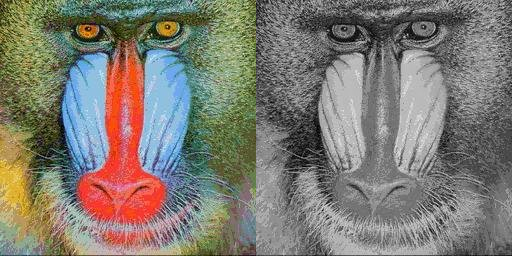

In [5]:
original = cv2.imread('/content/drive/MyDrive/images/Baboon.png')
import matplotlib.pyplot as plt

# Grayscale avg
gray_avg = np.mean(original, axis=2).astype(np.uint8)
print("4a. Grayscale Averaging")
cv2_imshow(cv2.hconcat([original, cv2.cvtColor(gray_avg, cv2.COLOR_GRAY2BGR)]))

4b. Grayscale Lightness


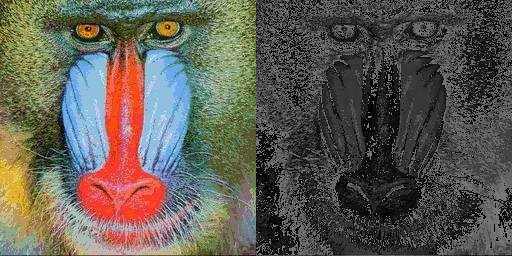

In [6]:
# Grayscale Lightness
gray_lightness = ((np.max(original, axis=2) + np.min(original, axis=2)) / 2).astype(np.uint8)
print("4b. Grayscale Lightness")
cv2_imshow(cv2.hconcat([original, cv2.cvtColor(gray_lightness, cv2.COLOR_GRAY2BGR)]))

4c. Grayscale Luminance


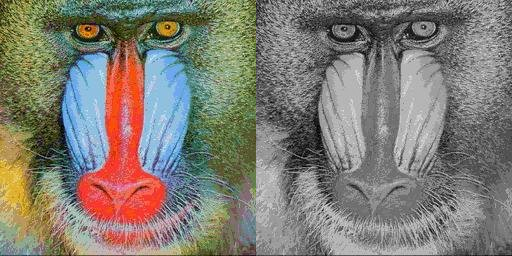

In [7]:
# Grayscale Luminance
gray_luminance = (0.299*original[:,:,2] + 0.587*original[:,:,1] + 0.114*original[:,:,0]).astype(np.uint8)
print("4c. Grayscale Luminance")
cv2_imshow(cv2.hconcat([original, cv2.cvtColor(gray_luminance, cv2.COLOR_GRAY2BGR)]))

5.

5. Tampilkan satu warna tertentu (Biru)


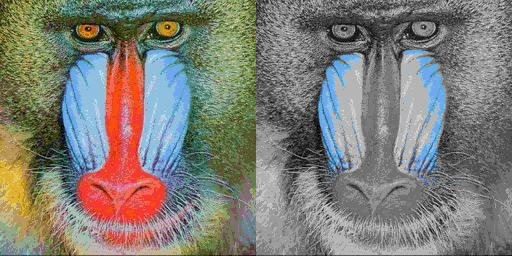

In [8]:
# Konversi ke HSV
hsv = cv2.cvtColor(original, cv2.COLOR_BGR2HSV)

# Define
lower_blue = np.array([100, 100, 100])
upper_blue = np.array([140, 255, 255])

# mask for the blue color
mask = cv2.inRange(hsv, lower_blue, upper_blue)

# grayscale image from the original
gray = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
gray_bgr = cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR)

# Combine
result = np.where(mask[:,:,None] != 0, original, gray_bgr)
final_frame = cv2.hconcat([original, result])
print("5. Tampilkan satu warna tertentu (Biru)")
cv2_imshow(final_frame)